# 스타크래프트 종목 분석
# 칼날여왕을 제거하고 전쟁을 시작하라
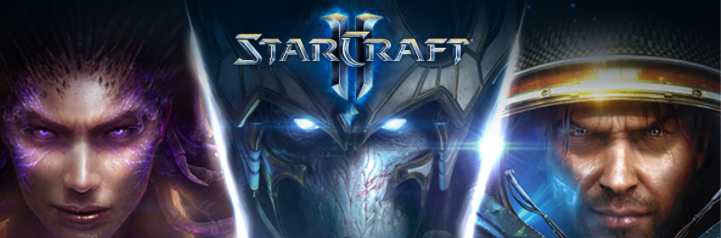
## 데이터 분석
- 데이터 셋 확인 : info() 
- 결측치 유뮤 파악 삭제 및 대체

### 불러오기

In [291]:
import pandas as pd
star = pd.read_excel('data/스타크래프트엑셀.xlsx', skiprows=1)
star

,Unnamed: 0,종족,이름,미네랄,가스,체력,공격력,사거리,지상,공중,능력
0,NaN,테란,마린,50.0,0.0,50,6.0,4.0,1.0,1.0,NaN
1,NaN,져그,저글링,50.0,0.0,35,5.0,1.0,1.0,0.0,NaN
2,NaN,프로토스,질럿,100.0,0.0,100,8.0,1.0,1.0,NaN,NaN
3,NaN,테란,메딕,50.0,25.0,60,NaN,0.0,0.0,0.0,치유
4,NaN,테란,탱크,150.0,100.0,150,30.0,7.0,1.0,0.0,NaN
5,NaN,져그,울트라리스크,200.0,200.0,400,20.0,1.0,1.0,0.0,NaN
6,NaN,프로토스,드라곤,125.0,50.0,100,20.0,4.0,1.0,1.0,NaN
7,NaN,져그,히드라리스크,75.0,25.0,80,10.0,4.0,1.0,1.0,NaN
8,NaN,프로토스,다크템플러,125.0,100.0,80,40.0,1.0,1.0,0.0,클로킹
9,NaN,져그,칼날여왕,NaN,NaN,500,500.0,NaN,NaN,NaN,NaN


In [292]:
star.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  0 non-null      float64
 1   종족          10 non-null     object 
 2   이름          10 non-null     object 
 3   미네랄         9 non-null      float64
 4   가스          9 non-null      float64
 5   체력          10 non-null     int64  
 6   공격력         9 non-null      float64
 7   사거리         9 non-null      float64
 8   지상          9 non-null      float64
 9   공중          8 non-null      float64
 10  능력          2 non-null      object 
dtypes: float64(7), int64(1), object(3)
memory usage: 1012.0+ bytes


### 일반적인 방법으로 삭제

In [294]:
star.columns

Index(['Unnamed: 0', '종족', '이름', '미네랄', '가스', '체력', '공격력', '사거리', '지상', '공중',
       '능력'],
      dtype='object')

In [295]:
# del star['Unnamed: 0']

In [296]:
# star.drop('Unnamed: 0',axis=1, inplace=True)

### 결측치 제거

In [298]:
star

,Unnamed: 0,종족,이름,미네랄,가스,체력,공격력,사거리,지상,공중,능력
0,NaN,테란,마린,50.0,0.0,50,6.0,4.0,1.0,1.0,NaN
1,NaN,져그,저글링,50.0,0.0,35,5.0,1.0,1.0,0.0,NaN
2,NaN,프로토스,질럿,100.0,0.0,100,8.0,1.0,1.0,NaN,NaN
3,NaN,테란,메딕,50.0,25.0,60,NaN,0.0,0.0,0.0,치유
4,NaN,테란,탱크,150.0,100.0,150,30.0,7.0,1.0,0.0,NaN
5,NaN,져그,울트라리스크,200.0,200.0,400,20.0,1.0,1.0,0.0,NaN
6,NaN,프로토스,드라곤,125.0,50.0,100,20.0,4.0,1.0,1.0,NaN
7,NaN,져그,히드라리스크,75.0,25.0,80,10.0,4.0,1.0,1.0,NaN
8,NaN,프로토스,다크템플러,125.0,100.0,80,40.0,1.0,1.0,0.0,클로킹
9,NaN,져그,칼날여왕,NaN,NaN,500,500.0,NaN,NaN,NaN,NaN


In [299]:
star.isnull().sum()

Unnamed: 0    10
종족             0
이름             0
미네랄            1
가스             1
체력             0
공격력            1
사거리            1
지상             1
공중             2
능력             8
dtype: int64

In [300]:
# dropna 결측치를 제거해 준다. 옵션 how ='all' ,axis=1 컬럼에 결측치가 모두 있으면 제거
# 기본 값은 how='any'
star.dropna(how='all', axis=1, inplace=True)

In [301]:
# 능력 컬럼에서 결측치가 있는 모든 행 삭제
# star.dropna(subset =['능력']) 

In [302]:
star.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   종족      10 non-null     object 
 1   이름      10 non-null     object 
 2   미네랄     9 non-null      float64
 3   가스      9 non-null      float64
 4   체력      10 non-null     int64  
 5   공격력     9 non-null      float64
 6   사거리     9 non-null      float64
 7   지상      9 non-null      float64
 8   공중      8 non-null      float64
 9   능력      2 non-null      object 
dtypes: float64(6), int64(1), object(3)
memory usage: 932.0+ bytes


### 결측치를 확인하고 결측치에 0 넣기

- fillna 함수는 결측값을 특정 값으로 채우기

In [305]:
star.fillna(0.0, inplace=True)

In [306]:
star.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   종족      10 non-null     object 
 1   이름      10 non-null     object 
 2   미네랄     10 non-null     float64
 3   가스      10 non-null     float64
 4   체력      10 non-null     int64  
 5   공격력     10 non-null     float64
 6   사거리     10 non-null     float64
 7   지상      10 non-null     float64
 8   공중      10 non-null     float64
 9   능력      10 non-null     object 
dtypes: float64(6), int64(1), object(3)
memory usage: 932.0+ bytes


###  데이터의 개수 세기
> count() : NaN 값은 제외한 나머지 데이터들의 개수를 세어줌 예) 데이터명.count()  
> size : NaN도 포함하여 데이터의 갯수를 세어줌 예)데이터명.size

In [308]:
star.count()

종족     10
이름     10
미네랄    10
가스     10
체력     10
공격력    10
사거리    10
지상     10
공중     10
능력     10
dtype: int64

In [309]:
star['가스'].size

10

In [310]:
star['가스'].sum()

500.0

## groupby 같은 값을 하나로 묶어 통계 또는 집계 결과를 얻기위해 사용

In [312]:
# 싸움한다고 했을 때 져그가 유리하다.
star.groupby('종족').count()

,이름,미네랄,가스,체력,공격력,사거리,지상,공중,능력
종족,,,,,,,,,
져그,4,4,4,4,4,4,4,4,4
테란,3,3,3,3,3,3,3,3,3
프로토스,3,3,3,3,3,3,3,3,3


In [313]:
# 져그가 확실히 유리 하다.
star.groupby('종족').size()

종족
져그      4
테란      3
프로토스    3
dtype: int64

- 현재 싸움을 하면 져그가 절대적으로 유리하다. 져그 유닛을 살펴서 공평하게 게임을 할 수 있도록 조절하자

### 져그 살펴보기

In [316]:
star

,종족,이름,미네랄,가스,체력,공격력,사거리,지상,공중,능력
0,테란,마린,50.0,0.0,50,6.0,4.0,1.0,1.0,0.0
1,져그,저글링,50.0,0.0,35,5.0,1.0,1.0,0.0,0.0
2,프로토스,질럿,100.0,0.0,100,8.0,1.0,1.0,0.0,0.0
3,테란,메딕,50.0,25.0,60,0.0,0.0,0.0,0.0,치유
4,테란,탱크,150.0,100.0,150,30.0,7.0,1.0,0.0,0.0
5,져그,울트라리스크,200.0,200.0,400,20.0,1.0,1.0,0.0,0.0
6,프로토스,드라곤,125.0,50.0,100,20.0,4.0,1.0,1.0,0.0
7,져그,히드라리스크,75.0,25.0,80,10.0,4.0,1.0,1.0,0.0
8,프로토스,다크템플러,125.0,100.0,80,40.0,1.0,1.0,0.0,클로킹
9,져그,칼날여왕,0.0,0.0,500,500.0,0.0,0.0,0.0,0.0


In [317]:
star[star['종족'] == '져그']

,종족,이름,미네랄,가스,체력,공격력,사거리,지상,공중,능력
1,져그,저글링,50.0,0.0,35,5.0,1.0,1.0,0.0,0.0
5,져그,울트라리스크,200.0,200.0,400,20.0,1.0,1.0,0.0,0.0
7,져그,히드라리스크,75.0,25.0,80,10.0,4.0,1.0,1.0,0.0
9,져그,칼날여왕,0.0,0.0,500,500.0,0.0,0.0,0.0,0.0


### 4. 져그.칼날여왕 행 제거

In [319]:
star.drop(9,inplace=True)
star

,종족,이름,미네랄,가스,체력,공격력,사거리,지상,공중,능력
0,테란,마린,50.0,0.0,50,6.0,4.0,1.0,1.0,0.0
1,져그,저글링,50.0,0.0,35,5.0,1.0,1.0,0.0,0.0
2,프로토스,질럿,100.0,0.0,100,8.0,1.0,1.0,0.0,0.0
3,테란,메딕,50.0,25.0,60,0.0,0.0,0.0,0.0,치유
4,테란,탱크,150.0,100.0,150,30.0,7.0,1.0,0.0,0.0
5,져그,울트라리스크,200.0,200.0,400,20.0,1.0,1.0,0.0,0.0
6,프로토스,드라곤,125.0,50.0,100,20.0,4.0,1.0,1.0,0.0
7,져그,히드라리스크,75.0,25.0,80,10.0,4.0,1.0,1.0,0.0
8,프로토스,다크템플러,125.0,100.0,80,40.0,1.0,1.0,0.0,클로킹


- 데이터 정재화 완료
---

### 능력이 있는 유닛 살펴보기

In [322]:
star['능력'] !=0

0    False
1    False
2    False
3     True
4    False
5    False
6    False
7    False
8     True
Name: 능력, dtype: bool

In [323]:
star[star['능력'] !=0]

,종족,이름,미네랄,가스,체력,공격력,사거리,지상,공중,능력
3,테란,메딕,50.0,25.0,60,0.0,0.0,0.0,0.0,치유
8,프로토스,다크템플러,125.0,100.0,80,40.0,1.0,1.0,0.0,클로킹


### 밥많이 먹는 유닛(미네랄)

In [325]:
# idxmax, idxmin
star['미네랄'].idxmax()

5

In [326]:
star.iloc[[1]]

,종족,이름,미네랄,가스,체력,공격력,사거리,지상,공중,능력
1,져그,저글링,50.0,0.0,35,5.0,1.0,1.0,0.0,0.0


In [327]:
# 조건 검색을 통해 데이터 추출
star[star['미네랄'] >= 100]

,종족,이름,미네랄,가스,체력,공격력,사거리,지상,공중,능력
2,프로토스,질럿,100.0,0.0,100,8.0,1.0,1.0,0.0,0.0
4,테란,탱크,150.0,100.0,150,30.0,7.0,1.0,0.0,0.0
5,져그,울트라리스크,200.0,200.0,400,20.0,1.0,1.0,0.0,0.0
6,프로토스,드라곤,125.0,50.0,100,20.0,4.0,1.0,1.0,0.0
8,프로토스,다크템플러,125.0,100.0,80,40.0,1.0,1.0,0.0,클로킹


- 훈련생들에게 여러가지 문제 내 볼것. 가스, 체력,공격력 등등

### 체력이 가장 강한 3개 이름 알아보기

In [330]:
star

,종족,이름,미네랄,가스,체력,공격력,사거리,지상,공중,능력
0,테란,마린,50.0,0.0,50,6.0,4.0,1.0,1.0,0.0
1,져그,저글링,50.0,0.0,35,5.0,1.0,1.0,0.0,0.0
2,프로토스,질럿,100.0,0.0,100,8.0,1.0,1.0,0.0,0.0
3,테란,메딕,50.0,25.0,60,0.0,0.0,0.0,0.0,치유
4,테란,탱크,150.0,100.0,150,30.0,7.0,1.0,0.0,0.0
5,져그,울트라리스크,200.0,200.0,400,20.0,1.0,1.0,0.0,0.0
6,프로토스,드라곤,125.0,50.0,100,20.0,4.0,1.0,1.0,0.0
7,져그,히드라리스크,75.0,25.0,80,10.0,4.0,1.0,1.0,0.0
8,프로토스,다크템플러,125.0,100.0,80,40.0,1.0,1.0,0.0,클로킹


In [331]:
star.sort_values('체력', ascending=False).head(3)

,종족,이름,미네랄,가스,체력,공격력,사거리,지상,공중,능력
5,져그,울트라리스크,200.0,200.0,400,20.0,1.0,1.0,0.0,0.0
4,테란,탱크,150.0,100.0,150,30.0,7.0,1.0,0.0,0.0
2,프로토스,질럿,100.0,0.0,100,8.0,1.0,1.0,0.0,0.0


### 공격력이 20이상인 종족과 이름 알아보기

In [333]:
star[star['공격력'] >=20]

,종족,이름,미네랄,가스,체력,공격력,사거리,지상,공중,능력
4,테란,탱크,150.0,100.0,150,30.0,7.0,1.0,0.0,0.0
5,져그,울트라리스크,200.0,200.0,400,20.0,1.0,1.0,0.0,0.0
6,프로토스,드라곤,125.0,50.0,100,20.0,4.0,1.0,1.0,0.0
8,프로토스,다크템플러,125.0,100.0,80,40.0,1.0,1.0,0.0,클로킹


In [334]:
star[star['공격력'] >=20]['공격력']

4    30.0
5    20.0
6    20.0
8    40.0
Name: 공격력, dtype: float64

### 사거리가 가장 긴 종족과 이름

In [336]:
star['사거리'].values.max() # 사거리가 긴 값 출력

7.0

In [337]:
star[star['사거리'] == 7]

,종족,이름,미네랄,가스,체력,공격력,사거리,지상,공중,능력
4,테란,탱크,150.0,100.0,150,30.0,7.0,1.0,0.0,0.0


### 종족별 그룹으로 묶기
- groupby : 같은 값을 하나로 묶어 통계 또는 집계 결과를 얻기 위해 사용

In [339]:
star.groupby('종족').size()

종족
져그      3
테란      3
프로토스    3
dtype: int64

In [340]:
star.groupby(['종족','이름']).sum()

미네랄     가스   체력   공격력  사거리   지상   공중   능력
종족   이름                                                 
져그   울트라리스크  200.0  200.0  400  20.0  1.0  1.0  0.0  0.0
     저글링      50.0    0.0   35   5.0  1.0  1.0  0.0  0.0
     히드라리스크   75.0   25.0   80  10.0  4.0  1.0  1.0  0.0
테란   마린       50.0    0.0   50   6.0  4.0  1.0  1.0  0.0
     메딕       50.0   25.0   60   0.0  0.0  0.0  0.0   치유
     탱크      150.0  100.0  150  30.0  7.0  1.0  0.0  0.0
프로토스 다크템플러   125.0  100.0   80  40.0  1.0  1.0  0.0  클로킹
     드라곤     125.0   50.0  100  20.0  4.0  1.0  1.0  0.0
     질럿      100.0    0.0  100   8.0  1.0  1.0  0.0  0.0

## 각 종족별로 묶어서 저장

- "star"라는 폴더 생성 후 저장
- 각 종족별로 묶어서 저장하기
- 종족별 이름 
    - terran(테란)
    - zerg(져그)
    - protoss(프로토스)

### 값 기준 정렬 sort_values
- ascending = True 오름차순(기본값), False 내림차순

In [344]:
star.sort_values('종족', ascending=True, inplace=True) 

In [345]:
star

,종족,이름,미네랄,가스,체력,공격력,사거리,지상,공중,능력
1,져그,저글링,50.0,0.0,35,5.0,1.0,1.0,0.0,0.0
5,져그,울트라리스크,200.0,200.0,400,20.0,1.0,1.0,0.0,0.0
7,져그,히드라리스크,75.0,25.0,80,10.0,4.0,1.0,1.0,0.0
0,테란,마린,50.0,0.0,50,6.0,4.0,1.0,1.0,0.0
3,테란,메딕,50.0,25.0,60,0.0,0.0,0.0,0.0,치유
4,테란,탱크,150.0,100.0,150,30.0,7.0,1.0,0.0,0.0
2,프로토스,질럿,100.0,0.0,100,8.0,1.0,1.0,0.0,0.0
6,프로토스,드라곤,125.0,50.0,100,20.0,4.0,1.0,1.0,0.0
8,프로토스,다크템플러,125.0,100.0,80,40.0,1.0,1.0,0.0,클로킹


### 인덱스 리셋

In [347]:
star.reset_index(drop=True, inplace=True)
star

,종족,이름,미네랄,가스,체력,공격력,사거리,지상,공중,능력
0,져그,저글링,50.0,0.0,35,5.0,1.0,1.0,0.0,0.0
1,져그,울트라리스크,200.0,200.0,400,20.0,1.0,1.0,0.0,0.0
2,져그,히드라리스크,75.0,25.0,80,10.0,4.0,1.0,1.0,0.0
3,테란,마린,50.0,0.0,50,6.0,4.0,1.0,1.0,0.0
4,테란,메딕,50.0,25.0,60,0.0,0.0,0.0,0.0,치유
5,테란,탱크,150.0,100.0,150,30.0,7.0,1.0,0.0,0.0
6,프로토스,질럿,100.0,0.0,100,8.0,1.0,1.0,0.0,0.0
7,프로토스,드라곤,125.0,50.0,100,20.0,4.0,1.0,1.0,0.0
8,프로토스,다크템플러,125.0,100.0,80,40.0,1.0,1.0,0.0,클로킹


In [348]:
star

,종족,이름,미네랄,가스,체력,공격력,사거리,지상,공중,능력
0,져그,저글링,50.0,0.0,35,5.0,1.0,1.0,0.0,0.0
1,져그,울트라리스크,200.0,200.0,400,20.0,1.0,1.0,0.0,0.0
2,져그,히드라리스크,75.0,25.0,80,10.0,4.0,1.0,1.0,0.0
3,테란,마린,50.0,0.0,50,6.0,4.0,1.0,1.0,0.0
4,테란,메딕,50.0,25.0,60,0.0,0.0,0.0,0.0,치유
5,테란,탱크,150.0,100.0,150,30.0,7.0,1.0,0.0,0.0
6,프로토스,질럿,100.0,0.0,100,8.0,1.0,1.0,0.0,0.0
7,프로토스,드라곤,125.0,50.0,100,20.0,4.0,1.0,1.0,0.0
8,프로토스,다크템플러,125.0,100.0,80,40.0,1.0,1.0,0.0,클로킹


In [349]:
져그 = star[star['종족'] == '져그']
테란 = star[star['종족'] == '테란']
프로토스 = star[star['종족'] == '프로토스']

In [350]:
져그 = star.iloc[0:2+1]
테란 = star.iloc[3:5+1]
프로토스 = star.iloc[6:8+1]

In [351]:
져그.to_csv('star/zerg.csv', encoding='utf-8-sig', index=False)
테란.to_csv('star/terran.csv', encoding='utf-8-sig')
프로토스.to_csv('star/protoss.csv', encoding='utf-8-sig')

In [352]:
pd.read_csv('star/zerg.csv')

,종족,이름,미네랄,가스,체력,공격력,사거리,지상,공중,능력
0,져그,저글링,50.0,0.0,35,5.0,1.0,1.0,0.0,0.0
1,져그,울트라리스크,200.0,200.0,400,20.0,1.0,1.0,0.0,0.0
2,져그,히드라리스크,75.0,25.0,80,10.0,4.0,1.0,1.0,0.0


## star 라는 폴더에서 zerg, terran, protoss를 불러 온 후 star_one 이라는 하나의 데이터로 합치세요.
> 힌트
>> - star_one 이라는 빈 데이터 프레임을 만든다.
>> - 필요없는 칼럼을 지우고, reset_index를 한다.
- 최종 결과물
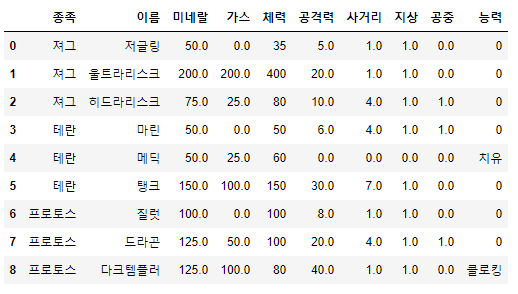

In [354]:
zerg1 = pd.read_csv('star/zerg.csv')
terran1 = pd.read_csv('star/terran.csv')
protoss1 = pd.read_csv('star/protoss.csv')

In [355]:
star_one = pd.concat([zerg1,terran1,protoss1])

In [356]:
star_one.reset_index(drop=True, inplace=True)
star_one

,종족,이름,미네랄,가스,체력,공격력,사거리,지상,공중,능력,Unnamed: 0
0,져그,저글링,50.0,0.0,35,5.0,1.0,1.0,0.0,0.0,NaN
1,져그,울트라리스크,200.0,200.0,400,20.0,1.0,1.0,0.0,0.0,NaN
2,져그,히드라리스크,75.0,25.0,80,10.0,4.0,1.0,1.0,0.0,NaN
3,테란,마린,50.0,0.0,50,6.0,4.0,1.0,1.0,0.0,3.0
4,테란,메딕,50.0,25.0,60,0.0,0.0,0.0,0.0,치유,4.0
5,테란,탱크,150.0,100.0,150,30.0,7.0,1.0,0.0,0.0,5.0
6,프로토스,질럿,100.0,0.0,100,8.0,1.0,1.0,0.0,0.0,6.0
7,프로토스,드라곤,125.0,50.0,100,20.0,4.0,1.0,1.0,0.0,7.0
8,프로토스,다크템플러,125.0,100.0,80,40.0,1.0,1.0,0.0,클로킹,8.0


---

In [358]:
zerg1 = pd.read_csv('star/zerg.csv')
terran1 = pd.read_csv('star/terran.csv')
protoss1 = pd.read_csv('star/protoss.csv')

In [359]:
# concat 함수로 붙이기
# Unnamed: 0 는 저장할 때 index=None 옵션을 설정 하면 불러올 때 안나타남.
result = pd.concat([zerg1,terran1,protoss1], ignore_index=True) # ignore_index=True 기존 인덱스 무시
result

,종족,이름,미네랄,가스,체력,공격력,사거리,지상,공중,능력,Unnamed: 0
0,져그,저글링,50.0,0.0,35,5.0,1.0,1.0,0.0,0.0,NaN
1,져그,울트라리스크,200.0,200.0,400,20.0,1.0,1.0,0.0,0.0,NaN
2,져그,히드라리스크,75.0,25.0,80,10.0,4.0,1.0,1.0,0.0,NaN
3,테란,마린,50.0,0.0,50,6.0,4.0,1.0,1.0,0.0,3.0
4,테란,메딕,50.0,25.0,60,0.0,0.0,0.0,0.0,치유,4.0
5,테란,탱크,150.0,100.0,150,30.0,7.0,1.0,0.0,0.0,5.0
6,프로토스,질럿,100.0,0.0,100,8.0,1.0,1.0,0.0,0.0,6.0
7,프로토스,드라곤,125.0,50.0,100,20.0,4.0,1.0,1.0,0.0,7.0
8,프로토스,다크템플러,125.0,100.0,80,40.0,1.0,1.0,0.0,클로킹,8.0
